# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
#from api_keys import api_key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['new norfolk',
 'qaanaaq',
 'panjab',
 'cajaruro',
 'dingle',
 'san luis',
 'ukhta',
 'rikitea',
 'port elizabeth',
 'sentyabrskiy',
 'tuktoyaktuk',
 'taolanaro',
 'busselton',
 'bestobe',
 'kysyl-syr',
 'barrow',
 'kodiak',
 'vaini',
 'georgetown',
 'bambous virieux',
 'hobart',
 'dangriga',
 'saint-philippe',
 'manokwari',
 'tilichiki',
 'haines junction',
 'bartica',
 'vanimo',
 'dikson',
 'punta arenas',
 'kapaa',
 'samusu',
 'atuona',
 'port alfred',
 'morgan city',
 'clyde river',
 'san policarpo',
 'ronse',
 'puerto ayora',
 'ushuaia',
 'jaguaquara',
 'dandong',
 'shihezi',
 'yellowknife',
 'nguiu',
 'broken hill',
 'saint-paul',
 'leshukonskoye',
 'airai',
 'arraial do cabo',
 'filingue',
 'tezu',
 'castro',
 'mount gambier',
 'binga',
 'tahlequah',
 'beringovskiy',
 'den helder',
 'auki',
 'ahipara',
 'madang',
 'thompson',
 'kaitangata',
 'barreirinhas',
 'sambava',
 'kapuskasing',
 'nemuro',
 'vila franca do campo',
 'batagay-alyta',
 'hami',
 'sao joao da barra',
 'talnakh

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key = api_keys.api_key
api_key

'ab7e13282b5d008d5b3a0b1cf84b4497'

In [58]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?&APPID=ab7e13282b5d008d5b3a0b1cf84b4497"
units = "metric"
# Build partial query URL
# query_url = f"{url}appid={api_key}&units={units}&q="
query_url = f"{url}&units={units}&q=Washington"
query_url

'http://api.openweathermap.org/data/2.5/weather?&APPID=ab7e13282b5d008d5b3a0b1cf84b4497&units=metric&q=Washington'

In [59]:
response = requests.get(query_url)
response

<Response [200]>

In [10]:
# List of city data
lat = []
lon = []
temp = []
humidity = []
cloudy = []
windspeed = []
count = 0
cityname = []
dt = []

query_url = f"{url}&units={units}&q="
query_url + city
response = requests.get(query_url + city).json()
response




{'coord': {'lon': 147.0587, 'lat': -42.7826},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 15.1,
  'feels_like': 14.06,
  'temp_min': 14.44,
  'temp_max': 16.11,
  'pressure': 1018,
  'humidity': 64},
 'visibility': 10000,
 'wind': {'speed': 0.94, 'deg': 341, 'gust': 1.56},
 'clouds': {'all': 95},
 'dt': 1616451735,
 'sys': {'type': 3,
  'id': 2031307,
  'country': 'AU',
  'sunrise': 1616444241,
  'sunset': 1616487565},
 'timezone': 39600,
 'id': 2155415,
 'name': 'New Norfolk',
 'cod': 200}

In [11]:
# Probe the cities, make API request and append results

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"{response}")
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        cityname.append(response['name'])
        dt.append(response['dt'])
        count = count + 1
    except:
        print("City not found. Skipping....")

print(f"lat: {lat} {len(lat)}")
print(f"lon: {lon} {len(lon)}")
print(f"temp: {temp} {len(temp)}")
print(f"humidity: {humidity} {len(humidity)}")
print(f"clouds: {cloudy} {len(cloudy)}")
print(f"wind speed: {windspeed} {len(windspeed)}")
print(f"date: {dt} {len(dt)}")
print(f"cityname: {cityname} {len(cityname)}")
        

{'coord': {'lon': 147.0587, 'lat': -42.7826}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 15.1, 'feels_like': 14.06, 'temp_min': 14.44, 'temp_max': 16.11, 'pressure': 1018, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 0.94, 'deg': 341, 'gust': 1.56}, 'clouds': {'all': 95}, 'dt': 1616451735, 'sys': {'type': 3, 'id': 2031307, 'country': 'AU', 'sunrise': 1616444241, 'sunset': 1616487565}, 'timezone': 39600, 'id': 2155415, 'name': 'New Norfolk', 'cod': 200}
{'coord': {'lon': -69.3632, 'lat': 77.484}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -26, 'feels_like': -31.53, 'temp_min': -26, 'temp_max': -26, 'pressure': 999, 'humidity': 78, 'sea_level': 999, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 2.46, 'deg': 27, 'gust': 2.53}, 'clouds': {'all': 96}, 'dt': 1616451800, 'sys': {'country': 'GL', 's

{'coord': {'lon': -175.2, 'lat': -21.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 27, 'feels_like': 29.99, 'temp_min': 27, 'temp_max': 27, 'pressure': 1011, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 180}, 'clouds': {'all': 40}, 'dt': 1616451804, 'sys': {'type': 1, 'id': 7285, 'country': 'TO', 'sunrise': 1616521535, 'sunset': 1616564921}, 'timezone': 46800, 'id': 4032243, 'name': 'Vaini', 'cod': 200}
{'coord': {'lon': 100.3354, 'lat': 5.4112}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 26.49, 'feels_like': 29.93, 'temp_min': 25, 'temp_max': 27.78, 'pressure': 1008, 'humidity': 78}, 'visibility': 8000, 'wind': {'speed': 2.06, 'deg': 50}, 'clouds': {'all': 20}, 'dt': 1616451785, 'sys': {'type': 1, 'id': 9429, 'country': 'MY', 'sunrise': 1616455291, 'sunset': 1616498937}, 'timezone': 28800, 'id

{'coord': {'lon': -91.2068, 'lat': 29.6994}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.97, 'feels_like': 17.78, 'temp_min': 21.67, 'temp_max': 22.22, 'pressure': 1014, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 7.72, 'deg': 140, 'gust': 11.32}, 'clouds': {'all': 90}, 'dt': 1616451809, 'sys': {'type': 1, 'id': 5422, 'country': 'US', 'sunrise': 1616414753, 'sunset': 1616458634}, 'timezone': -18000, 'id': 4333811, 'name': 'Morgan City', 'cod': 200}
{'coord': {'lon': -68.5914, 'lat': 70.4692}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -29, 'feels_like': -37.57, 'temp_min': -29, 'temp_max': -29, 'pressure': 1003, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 280}, 'clouds': {'all': 20}, 'dt': 1616451809, 'sys': {'type': 1, 'id': 776, 'country': 'CA', 'sunrise': 1616408537, 'sunset': 1

{'coord': {'lon': 3.3168, 'lat': 14.3521}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 31.18, 'feels_like': 24.75, 'temp_min': 31.18, 'temp_max': 31.18, 'pressure': 1007, 'humidity': 11, 'sea_level': 1007, 'grnd_level': 982}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 3, 'gust': 12.55}, 'clouds': {'all': 41}, 'dt': 1616451813, 'sys': {'country': 'NE', 'sunrise': 1616392163, 'sunset': 1616435862}, 'timezone': 3600, 'id': 2444995, 'name': 'Filingué', 'cod': 200}
{'coord': {'lon': 96.1667, 'lat': 27.9167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21.29, 'feels_like': 18.41, 'temp_min': 21.29, 'temp_max': 21.29, 'pressure': 1013, 'humidity': 30, 'sea_level': 1013, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 1.97, 'deg': 47, 'gust': 2.21}, 'clouds': {'all': 10}, 'dt': 1616451814, 'sys': {'country': 'I

{'coord': {'lon': -82.4331, 'lat': 49.4169}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 4.99, 'feels_like': 0.97, 'temp_min': 4, 'temp_max': 6, 'pressure': 1015, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 310}, 'clouds': {'all': 100}, 'dt': 1616451818, 'sys': {'type': 1, 'id': 660, 'country': 'CA', 'sunrise': 1616412457, 'sunset': 1616456719}, 'timezone': -14400, 'id': 5989403, 'name': 'Kapuskasing', 'cod': 200}
{'coord': {'lon': 145.575, 'lat': 43.3236}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 0.98, 'feels_like': -5.14, 'temp_min': 0.98, 'temp_max': 0.98, 'pressure': 1011, 'humidity': 75, 'sea_level': 1011, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 5.34, 'deg': 247, 'gust': 9.41}, 'clouds': {'all': 3}, 'dt': 1616451818, 'sys': {'country': 'JP', 'sunrise': 1616444171, 'sunset'

{'coord': {'lon': -67.5, 'lat': -45.8667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 23, 'feels_like': 20.53, 'temp_min': 23, 'temp_max': 23, 'pressure': 1010, 'humidity': 40}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1616451822, 'sys': {'type': 1, 'id': 8284, 'country': 'AR', 'sunrise': 1616409313, 'sunset': 1616452697}, 'timezone': -10800, 'id': 3860443, 'name': 'Comodoro Rivadavia', 'cod': 200}
{'coord': {'lon': -39.9167, 'lat': -2.9248}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.77, 'feels_like': 27.97, 'temp_min': 25.77, 'temp_max': 25.77, 'pressure': 1011, 'humidity': 77, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.14, 'deg': 59, 'gust': 4.34}, 'clouds': {'all': 100}, 'dt': 1616451822, 'sys': {'country': 'BR', 'sunrise': 1616402596

{'coord': {'lon': -155.09, 'lat': 19.7297}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 21.15, 'feels_like': 18.86, 'temp_min': 17.78, 'temp_max': 24, 'pressure': 1020, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 90}, 'rain': {'1h': 5.97}, 'clouds': {'all': 90}, 'dt': 1616451826, 'sys': {'type': 1, 'id': 7881, 'country': 'US', 'sunrise': 1616430134, 'sunset': 1616473909}, 'timezone': -36000, 'id': 5855927, 'name': 'Hilo', 'cod': 200}
{'coord': {'lon': 18.4232, 'lat': -33.9258}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 18.63, 'feels_like': 15.12, 'temp_min': 16.11, 'temp_max': 20.56, 'pressure': 1012, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 170}, 'clouds': {'all': 0}, 'dt': 1616451756, 'sys': {'type': 1, 'id': 1899, 'country': 'ZA', 'sunrise': 1616475104, 'sunset': 

{'coord': {'lon': -73.414, 'lat': 41.3712}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 13.16, 'feels_like': 7.72, 'temp_min': 11.67, 'temp_max': 15, 'pressure': 1027, 'humidity': 29}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 140}, 'clouds': {'all': 1}, 'dt': 1616451831, 'sys': {'type': 1, 'id': 3888, 'country': 'US', 'sunrise': 1616410391, 'sunset': 1616454457}, 'timezone': -14400, 'id': 5282297, 'name': 'Bethel', 'cod': 200}
{'coord': {'lon': -79.2353, 'lat': 42.097}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 18, 'feels_like': 12.87, 'temp_min': 18, 'temp_max': 18, 'pressure': 1022, 'humidity': 13}, 'visibility': 10000, 'wind': {'speed': 2.88, 'deg': 175, 'gust': 5.27}, 'clouds': {'all': 1}, 'dt': 1616451831, 'sys': {'type': 1, 'id': 4588, 'country': 'US', 'sunrise': 1616411779, 'sunset': 1616455862}, 'timezone': -1

{'coord': {'lon': -52.0986, 'lat': -32.035}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 22.89, 'feels_like': 23.17, 'temp_min': 22.78, 'temp_max': 23, 'pressure': 1018, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 100}, 'clouds': {'all': 90}, 'dt': 1616451835, 'sys': {'type': 1, 'id': 8408, 'country': 'BR', 'sunrise': 1616405590, 'sunset': 1616449029}, 'timezone': -10800, 'id': 3451138, 'name': 'Rio Grande', 'cod': 200}
{'coord': {'lon': 32.466, 'lat': 57.643}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -6.48, 'feels_like': -10.24, 'temp_min': -6.48, 'temp_max': -6.48, 'pressure': 1009, 'humidity': 98, 'sea_level': 1009, 'grnd_level': 1002}, 'visibility': 7942, 'wind': {'speed': 1.39, 'deg': 310, 'gust': 2.91}, 'clouds': {'all': 82}, 'dt': 1616451835, 'sys': {'country': 'RU', 'sunrise': 161647

{'coord': {'lon': -92.9377, 'lat': 47.4272}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 9, 'feels_like': 5.09, 'temp_min': 9, 'temp_max': 9, 'pressure': 1015, 'humidity': 31}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 280}, 'clouds': {'all': 1}, 'dt': 1616451840, 'sys': {'type': 1, 'id': 4368, 'country': 'US', 'sunrise': 1616415001, 'sunset': 1616459216}, 'timezone': -18000, 'id': 5030005, 'name': 'Hibbing', 'cod': 200}
{'coord': {'lon': -58.7368, 'lat': -38.5473}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.22, 'feels_like': 17.58, 'temp_min': 17.22, 'temp_max': 17.22, 'pressure': 1021, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 74, 'gust': 3.58}, 'clouds': {'all': 70}, 'dt': 1616451840, 'sys': {'type': 3, 'id': 2010353, 'country': 'AR', 'sunrise': 1616407196, 'sunset': 1616450609}, 't

{'coord': {'lon': -20.2734, 'lat': 63.4427}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 3.33, 'feels_like': -9.47, 'temp_min': 3.33, 'temp_max': 3.33, 'pressure': 994, 'humidity': 60, 'sea_level': 994, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 14.76, 'deg': 225, 'gust': 18.86}, 'clouds': {'all': 100}, 'dt': 1616451845, 'sys': {'country': 'IS', 'sunrise': 1616397275, 'sunset': 1616442071}, 'timezone': 0, 'id': 3412093, 'name': 'Vestmannaeyjar', 'cod': 200}
{'coord': {'lon': 112.3761, 'lat': -6.8767}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.43, 'feels_like': 28.36, 'temp_min': 25.43, 'temp_max': 25.43, 'pressure': 1008, 'humidity': 85, 'sea_level': 1008, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 235, 'gust': 3.88}, 'clouds': {'all': 100}, 'dt': 1616451631, 'sys': 

{'coord': {'lon': 2.3333, 'lat': 48.9167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 5.79, 'feels_like': 3.2, 'temp_min': 5, 'temp_max': 7.22, 'pressure': 1027, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 140}, 'clouds': {'all': 40}, 'dt': 1616451849, 'sys': {'type': 1, 'id': 6540, 'country': 'FR', 'sunrise': 1616392150, 'sunset': 1616436347}, 'timezone': 3600, 'id': 2980915, 'name': 'Arrondissement de Saint-Denis', 'cod': 200}
{'coord': {'lon': 167.4833, 'lat': -22.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 24.31, 'feels_like': 21.51, 'temp_min': 24.31, 'temp_max': 24.31, 'pressure': 1014, 'humidity': 65, 'sea_level': 1014, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 7.58, 'deg': 94, 'gust': 7.71}, 'clouds': {'all': 100}, 'dt': 1616451850, 'sys': {'country': 'NC', 

{'coord': {'lon': 17.9811, 'lat': 69.2296}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 5, 'feels_like': 0.99, 'temp_min': 5, 'temp_max': 5, 'pressure': 991, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 220}, 'clouds': {'all': 90}, 'dt': 1616451854, 'sys': {'type': 1, 'id': 1619, 'country': 'NO', 'sunrise': 1616387893, 'sunset': 1616433094}, 'timezone': 3600, 'id': 3157549, 'name': 'Finnsnes', 'cod': 200}
{'coord': {'lon': -62.9967, 'lat': -40.8135}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 25.05, 'feels_like': 20.65, 'temp_min': 25.05, 'temp_max': 25.05, 'pressure': 1014, 'humidity': 27, 'sea_level': 1014, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 343, 'gust': 7.47}, 'clouds': {'all': 0}, 'dt': 1616451854, 'sys': {'country': 'AR', 'sunrise': 1616408223, 'sunset': 16

{'coord': {'lon': -51.1, 'lat': 69.2167}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -16, 'feels_like': -22.75, 'temp_min': -16, 'temp_max': -16, 'pressure': 993, 'humidity': 85}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 250}, 'snow': {'1h': 0.15}, 'clouds': {'all': 75}, 'dt': 1616451859, 'sys': {'type': 1, 'id': 165, 'country': 'GL', 'sunrise': 1616404422, 'sunset': 1616449717}, 'timezone': -10800, 'id': 3423146, 'name': 'Ilulissat', 'cod': 200}
{'coord': {'lon': -64.7981, 'lat': -7.2586}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.15, 'feels_like': 30.15, 'temp_min': 25.15, 'temp_max': 25.15, 'pressure': 1008, 'humidity': 92, 'sea_level': 1008, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 0.96, 'deg': 184, 'gust': 1.2}, 'clouds': {'all': 59}, 'dt': 1616451859, 'sys': {'country': 'BR', 'sunrise

{'coord': {'lon': 135.8667, 'lat': -34.7333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 17.99, 'feels_like': 17.74, 'temp_min': 17.99, 'temp_max': 17.99, 'pressure': 1011, 'humidity': 90, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.38, 'deg': 181, 'gust': 5.05}, 'clouds': {'all': 2}, 'dt': 1616451863, 'sys': {'country': 'AU', 'sunrise': 1616446905, 'sunset': 1616490272}, 'timezone': 37800, 'id': 2063036, 'name': 'Port Lincoln', 'cod': 200}
{'coord': {'lon': 61.8558, 'lat': 59.1766}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -7.46, 'feels_like': -13.18, 'temp_min': -7.46, 'temp_max': -7.46, 'pressure': 1007, 'humidity': 91, 'sea_level': 1007, 'grnd_level': 997}, 'visibility': 10000, 'wind': {'speed': 3.95, 'deg': 207, 'gust': 12.18}, 'clouds': {'all': 91}, 'dt': 1616451863, 'sys': {'c

{'coord': {'lon': 121.9, 'lat': -33.8667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 16, 'feels_like': 13.07, 'temp_min': 16, 'temp_max': 16, 'pressure': 1016, 'humidity': 72}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 180}, 'clouds': {'all': 90}, 'dt': 1616451867, 'sys': {'type': 1, 'id': 9525, 'country': 'AU', 'sunrise': 1616450256, 'sunset': 1616493623}, 'timezone': 28800, 'id': 2071860, 'name': 'Esperance', 'cod': 200}
{'coord': {'lon': -65.2226, 'lat': -26.8241}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21, 'feels_like': 22.35, 'temp_min': 21, 'temp_max': 21, 'pressure': 1018, 'humidity': 83}, 'visibility': 8000, 'wind': {'speed': 2.06, 'deg': 230}, 'clouds': {'all': 90}, 'dt': 1616451605, 'sys': {'type': 1, 'id': 8248, 'country': 'AR', 'sunrise': 1616408730, 'sunset': 1616452187}, 'timezone': -10

{'coord': {'lon': -149.3333, 'lat': -17.5333}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 30, 'feels_like': 31.81, 'temp_min': 30, 'temp_max': 30, 'pressure': 1013, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 5.66, 'deg': 200}, 'clouds': {'all': 20}, 'dt': 1616451872, 'sys': {'type': 1, 'id': 7318, 'country': 'PF', 'sunrise': 1616428898, 'sunset': 1616472383}, 'timezone': -36000, 'id': 4033356, 'name': 'Tiarei', 'cod': 200}
{'coord': {'lon': 113.6333, 'lat': -24.8667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 22, 'feels_like': 18.74, 'temp_min': 22, 'temp_max': 22, 'pressure': 1011, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 9.26, 'deg': 170}, 'clouds': {'all': 0}, 'dt': 1616451872, 'sys': {'type': 1, 'id': 9505, 'country': 'AU', 'sunrise': 1616452213, 'sunset': 1616495634}, 'timezone': 28800, 'id': 

{'cod': '404', 'message': 'city not found'}
City not found. Skipping....
{'coord': {'lon': -12.505, 'lat': 7.5264}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.64, 'feels_like': 27.61, 'temp_min': 25.64, 'temp_max': 25.64, 'pressure': 1011, 'humidity': 80, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 3.85, 'deg': 249, 'gust': 6.95}, 'clouds': {'all': 100}, 'dt': 1616451877, 'sys': {'country': 'SL', 'sunrise': 1616395985, 'sunset': 1616439633}, 'timezone': 0, 'id': 2409914, 'name': 'Bonthe', 'cod': 200}
{'coord': {'lon': -99.3833, 'lat': 23.4167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 31.52, 'feels_like': 26.89, 'temp_min': 31.11, 'temp_max': 32, 'pressure': 1002, 'humidity': 29}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 140, 'gust': 12.35}, 'clouds': {'all': 1}, 'dt': 161

{'coord': {'lon': 40.045, 'lat': 48.0448}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 3, 'feels_like': -2.18, 'temp_min': 3, 'temp_max': 3, 'pressure': 1003, 'humidity': 93}, 'visibility': 7000, 'wind': {'speed': 5, 'deg': 120}, 'rain': {'1h': 1.33}, 'clouds': {'all': 75}, 'dt': 1616451881, 'sys': {'type': 1, 'id': 8971, 'country': 'RU', 'sunrise': 1616469399, 'sunset': 1616513763}, 'timezone': 10800, 'id': 582447, 'name': 'Almaznyy', 'cod': 200}
{'coord': {'lon': 114.1577, 'lat': 22.2855}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 16.74, 'feels_like': 12.51, 'temp_min': 10.56, 'temp_max': 18.33, 'pressure': 1021, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 6.25, 'deg': 68, 'gust': 6.72}, 'clouds': {'all': 97}, 'dt': 1616451590, 'sys': {'type': 3, 'id': 2035800, 'country': 'HK', 'sunrise': 1616451886, 'sun

{'coord': {'lon': 129.2139, 'lat': 35.2442}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 2, 'feels_like': -1.7, 'temp_min': 2, 'temp_max': 2, 'pressure': 1023, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 290}, 'clouds': {'all': 0}, 'dt': 1616451885, 'sys': {'type': 1, 'id': 8086, 'country': 'KR', 'sunrise': 1616448177, 'sunset': 1616492192}, 'timezone': 32400, 'id': 1842966, 'name': 'Gijang', 'cod': 200}
{'coord': {'lon': 30.7861, 'lat': 59.7035}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -5.48, 'feels_like': -10.6, 'temp_min': -6.67, 'temp_max': -3.89, 'pressure': 1009, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 260}, 'clouds': {'all': 0}, 'dt': 1616451886, 'sys': {'type': 1, 'id': 8926, 'country': 'RU', 'sunrise': 1616471367, 'sunset': 1616516238}, 'timezone': 10800, 'id': 546105

{'coord': {'lon': 131.25, 'lat': -0.8833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.3, 'feels_like': 28.27, 'temp_min': 26.3, 'temp_max': 26.3, 'pressure': 1010, 'humidity': 84, 'sea_level': 1010, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 4.98, 'deg': 50, 'gust': 6.27}, 'clouds': {'all': 100}, 'dt': 1616451871, 'sys': {'country': 'ID', 'sunrise': 1616447901, 'sunset': 1616491492}, 'timezone': 32400, 'id': 1626542, 'name': 'Sorong', 'cod': 200}
{'coord': {'lon': 86.1469, 'lat': 41.7597}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 9.2, 'feels_like': 4.82, 'temp_min': 9.2, 'temp_max': 9.2, 'pressure': 1014, 'humidity': 37, 'sea_level': 1014, 'grnd_level': 906}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 48, 'gust': 2.51}, 'clouds': {'all': 91}, 'dt': 1616451890, 'sys': {'country': 'CN',

{'coord': {'lon': 156.125, 'lat': 50.6789}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -0.57, 'feels_like': -10.16, 'temp_min': -0.57, 'temp_max': -0.57, 'pressure': 999, 'humidity': 80, 'sea_level': 999, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 10.19, 'deg': 236, 'gust': 15.28}, 'clouds': {'all': 66}, 'dt': 1616451894, 'sys': {'country': 'RU', 'sunrise': 1616441539, 'sunset': 1616485916}, 'timezone': 39600, 'id': 2121385, 'name': "Severo-Kuril'sk", 'cod': 200}
{'coord': {'lon': 107.5167, 'lat': 26.2667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 8.84, 'feels_like': 7.58, 'temp_min': 8.84, 'temp_max': 8.84, 'pressure': 1022, 'humidity': 81, 'sea_level': 1022, 'grnd_level': 927}, 'visibility': 10000, 'wind': {'speed': 0.42, 'deg': 20, 'gust': 0.43}, 'clouds': {'all': 99}, 'dt': 1616451894, 'sys': {'

{'coord': {'lon': 156.8419, 'lat': -8.103}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.58, 'feels_like': 31.56, 'temp_min': 28.58, 'temp_max': 28.58, 'pressure': 1010, 'humidity': 72, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.25, 'deg': 96, 'gust': 3.37}, 'clouds': {'all': 82}, 'dt': 1616451899, 'sys': {'country': 'SB', 'sunrise': 1616441786, 'sunset': 1616485325}, 'timezone': 39600, 'id': 2108857, 'name': 'Gizo Government Station', 'cod': 200}
{'coord': {'lon': 9.6134, 'lat': 1.574}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 26, 'feels_like': 30.69, 'temp_min': 26, 'temp_max': 26, 'pressure': 1010, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 2.43, 'deg': 176, 'gust': 3.06}, 'clouds': {'all': 40}, 'dt': 1616451899, 'sys': {'type': 1, 'id': 2047, 'country': 'GQ',

{'coord': {'lon': 120.45, 'lat': 32.5436}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 5.22, 'feels_like': 0.96, 'temp_min': 5, 'temp_max': 5.56, 'pressure': 1026, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 3.59, 'deg': 191, 'gust': 5.68}, 'clouds': {'all': 0}, 'dt': 1616451904, 'sys': {'type': 3, 'id': 2016019, 'country': 'CN', 'sunrise': 1616450302, 'sunset': 1616494273}, 'timezone': 28800, 'id': 1809116, 'name': 'Hai’an', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not found. Skipping....
{'coord': {'lon': -97.5169, 'lat': 28.017}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.48, 'feels_like': 16.29, 'temp_min': 21.67, 'temp_max': 23, 'pressure': 1005, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 11.83, 'deg': 150, 'gust': 15.95}, 'clouds': {'all': 90}, 'dt': 1616451905, 'sys': 

{'coord': {'lon': -6.589, 'lat': 62.2266}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7, 'feels_like': 4.23, 'temp_min': 7, 'temp_max': 7, 'pressure': 1006, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1616451909, 'sys': {'type': 1, 'id': 1596, 'country': 'FO', 'sunrise': 1616394034, 'sunset': 1616438745}, 'timezone': 0, 'id': 2618795, 'name': 'Klaksvík', 'cod': 200}
{'coord': {'lon': -39.2689, 'lat': -3.2778}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 25.43, 'feels_like': 28.17, 'temp_min': 25.43, 'temp_max': 25.43, 'pressure': 1011, 'humidity': 79, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 2.44, 'deg': 54, 'gust': 3.96}, 'clouds': {'all': 25}, 'dt': 1616451639, 'sys': {'country': 'BR', 'sunrise': 1616402442, 'sunset': 

{'coord': {'lon': 90.2333, 'lat': 51.0333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -4.44, 'feels_like': -7.66, 'temp_min': -4.44, 'temp_max': -4.44, 'pressure': 1024, 'humidity': 76, 'sea_level': 1024, 'grnd_level': 906}, 'visibility': 10000, 'wind': {'speed': 0.46, 'deg': 79, 'gust': 1.21}, 'clouds': {'all': 100}, 'dt': 1616451913, 'sys': {'country': 'RU', 'sunrise': 1616457322, 'sunset': 1616501754}, 'timezone': 25200, 'id': 1489828, 'name': 'Teeli', 'cod': 200}
{'coord': {'lon': 114.3, 'lat': 25.1167}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 13.18, 'feels_like': 11.4, 'temp_min': 13.18, 'temp_max': 13.18, 'pressure': 1023, 'humidity': 59, 'sea_level': 1023, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 16, 'gust': 1.09}, 'rain': {'1h': 2.368}, 'clouds': {'all': 100}, 'dt': 161645191

{'coord': {'lon': 31.6948, 'lat': 26.557}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 28, 'feels_like': 24.69, 'temp_min': 28, 'temp_max': 28, 'pressure': 1005, 'humidity': 20}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 240}, 'clouds': {'all': 0}, 'dt': 1616451918, 'sys': {'type': 1, 'id': 2548, 'country': 'EG', 'sunrise': 1616471633, 'sunset': 1616515536}, 'timezone': 7200, 'id': 347796, 'name': 'Sohag', 'cod': 200}
{'coord': {'lon': -78.1522, 'lat': -10.0681}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 24.14, 'feels_like': 24, 'temp_min': 24.14, 'temp_max': 24.14, 'pressure': 1010, 'humidity': 76, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.24, 'deg': 186, 'gust': 6.57}, 'clouds': {'all': 23}, 'dt': 1616451918, 'sys': {'country': 'PE', 'sunrise': 1616411792, 'sunset': 1616455329

{'coord': {'lon': 68.9678, 'lat': 22.2394}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.99, 'feels_like': 26.78, 'temp_min': 24.99, 'temp_max': 24.99, 'pressure': 1010, 'humidity': 85, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 4.37, 'deg': 287, 'gust': 6.28}, 'clouds': {'all': 0}, 'dt': 1616451922, 'sys': {'country': 'IN', 'sunrise': 1616462724, 'sunset': 1616506557}, 'timezone': 19800, 'id': 1272140, 'name': 'Dwārka', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
City not found. Skipping....
{'coord': {'lon': -65.7852, 'lat': -28.4696}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 18.25, 'feels_like': 20.22, 'temp_min': 14.44, 'temp_max': 20.56, 'pressure': 1014, 'humidity': 91}, 'visibility': 10000, 'wind': {'speed': 0.45, 'deg': 0, 'gust': 1.34}, 'clouds': {'all': 97}, 'dt

{'coord': {'lon': -63.9039, 'lat': -8.7619}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 24, 'feels_like': 28.15, 'temp_min': 24, 'temp_max': 24, 'pressure': 1009, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 210}, 'rain': {'1h': 0.87}, 'clouds': {'all': 75}, 'dt': 1616451927, 'sys': {'type': 1, 'id': 8424, 'country': 'BR', 'sunrise': 1616408369, 'sunset': 1616451915}, 'timezone': -14400, 'id': 3662762, 'name': 'Porto Velho', 'cod': 200}
{'coord': {'lon': 151.7833, 'lat': -32.5833}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 18.74, 'feels_like': 18.19, 'temp_min': 18.33, 'temp_max': 19, 'pressure': 1008, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 4.63, 'deg': 50}, 'rain': {'1h': 0.24}, 'clouds': {'all': 90}, 'dt': 1616451927, 'sys': {'type': 1, 'id': 9605, 'country': 'AU', 'sunrise': 161644307

{'coord': {'lon': -74.3006, 'lat': 4.3072}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 14, 'feels_like': 11.43, 'temp_min': 14, 'temp_max': 14, 'pressure': 1024, 'humidity': 82}, 'visibility': 7000, 'wind': {'speed': 4.12, 'deg': 280}, 'clouds': {'all': 75}, 'dt': 1616451932, 'sys': {'type': 1, 'id': 8582, 'country': 'CO', 'sunrise': 1616410822, 'sunset': 1616454451}, 'timezone': -18000, 'id': 3672813, 'name': 'Pasca', 'cod': 200}
{'coord': {'lon': -75.4398, 'lat': 1.4766}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.22, 'feels_like': 30.38, 'temp_min': 25.22, 'temp_max': 25.22, 'pressure': 1009, 'humidity': 91, 'sea_level': 1009, 'grnd_level': 982}, 'visibility': 9358, 'wind': {'speed': 0.64, 'deg': 202, 'gust': 1.2}, 'clouds': {'all': 75}, 'dt': 1616451932, 'sys': {'country': 'CO', 'sunrise': 1616411106, 'sunset': 

{'coord': {'lon': 10.0667, 'lat': 6.3833}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 19.23, 'feels_like': 21.12, 'temp_min': 19.23, 'temp_max': 19.23, 'pressure': 1014, 'humidity': 94, 'sea_level': 1014, 'grnd_level': 897}, 'visibility': 2935, 'wind': {'speed': 1.44, 'deg': 97, 'gust': 3.22}, 'rain': {'1h': 7.93}, 'clouds': {'all': 100}, 'dt': 1616451936, 'sys': {'country': 'CM', 'sunrise': 1616390574, 'sunset': 1616434212}, 'timezone': 3600, 'id': 2221053, 'name': 'Wum', 'cod': 200}
{'coord': {'lon': 121.9702, 'lat': 20.4487}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.05, 'feels_like': 15.28, 'temp_min': 22.05, 'temp_max': 22.05, 'pressure': 1020, 'humidity': 73, 'sea_level': 1020, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 13.06, 'deg': 51, 'gust': 13.3}, 'clouds': {'all': 100}, 'dt': 161

{'coord': {'lon': -9.0603, 'lat': 42.7762}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 8.52, 'feels_like': 6.13, 'temp_min': 8.33, 'temp_max': 8.89, 'pressure': 1023, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 2.04, 'deg': 101, 'gust': 2.09}, 'clouds': {'all': 5}, 'dt': 1616451941, 'sys': {'type': 3, 'id': 2000018, 'country': 'ES', 'sunrise': 1616394951, 'sunset': 1616439014}, 'timezone': 3600, 'id': 3115824, 'name': 'Muros', 'cod': 200}
{'coord': {'lon': 97.2, 'lat': 40.2833}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 2.78, 'feels_like': -3.39, 'temp_min': 2.78, 'temp_max': 2.78, 'pressure': 1018, 'humidity': 21, 'sea_level': 1018, 'grnd_level': 853}, 'visibility': 10000, 'wind': {'speed': 3.84, 'deg': 270, 'gust': 3.84}, 'clouds': {'all': 42}, 'dt': 1616451941, 'sys': {'country': 'CN', 'sunrise': 16164558

{'coord': {'lon': -91.9167, 'lat': 14.3}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 29, 'feels_like': 32.78, 'temp_min': 29, 'temp_max': 29, 'pressure': 1012, 'humidity': 70}, 'visibility': 7000, 'wind': {'speed': 2.06, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1616451945, 'sys': {'type': 1, 'id': 7068, 'country': 'GT', 'sunrise': 1616415008, 'sunset': 1616458719}, 'timezone': -21600, 'id': 3598787, 'name': 'Champerico', 'cod': 200}
{'coord': {'lon': 22.9798, 'lat': 53.8432}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 0.05, 'feels_like': -5.4, 'temp_min': 0.05, 'temp_max': 0.05, 'pressure': 1014, 'humidity': 88, 'sea_level': 1014, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 4.62, 'deg': 304, 'gust': 12.87}, 'clouds': {'all': 100}, 'dt': 1616451946, 'sys': {'country': 'PL', 'sunrise': 1616387131, 'suns

{'coord': {'lon': 110.3967, 'lat': 18.8003}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 19.96, 'feels_like': 19.27, 'temp_min': 19.96, 'temp_max': 19.96, 'pressure': 1019, 'humidity': 80, 'sea_level': 1019, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 4.05, 'deg': 6, 'gust': 6.64}, 'clouds': {'all': 100}, 'dt': 1616451950, 'sys': {'country': 'CN', 'sunrise': 1616452809, 'sunset': 1616496591}, 'timezone': 28800, 'id': 1791779, 'name': 'Wanning', 'cod': 200}
{'coord': {'lon': -23.5087, 'lat': 14.9215}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 20, 'feels_like': 16.21, 'temp_min': 20, 'temp_max': 20, 'pressure': 1014, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 7.72, 'deg': 30}, 'clouds': {'all': 20}, 'dt': 1616451950, 'sys': {'type': 1, 'id': 2462, 'country': 'CV', 'sunrise': 1616398596, 'sunse

{'coord': {'lon': -82.2859, 'lat': 27.9378}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 20.1, 'feels_like': 20.31, 'temp_min': 19.44, 'temp_max': 21, 'pressure': 1015, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 10}, 'clouds': {'all': 90}, 'dt': 1616451955, 'sys': {'type': 1, 'id': 6165, 'country': 'US', 'sunrise': 1616412625, 'sunset': 1616456480}, 'timezone': -14400, 'id': 4148757, 'name': 'Brandon', 'cod': 200}
{'coord': {'lon': -4.2167, 'lat': 51.0333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 5.23, 'feels_like': 3.21, 'temp_min': 3.33, 'temp_max': 7.22, 'pressure': 1026, 'humidity': 89}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 181, 'gust': 2.24}, 'clouds': {'all': 99}, 'dt': 1616451955, 'sys': {'type': 3, 'id': 2005965, 'country': 'GB', 'sunrise': 1616393691, 'sunset': 16

{'coord': {'lon': 78.661, 'lat': 54.7021}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -9.81, 'feels_like': -15.38, 'temp_min': -9.81, 'temp_max': -9.81, 'pressure': 1017, 'humidity': 96, 'sea_level': 1017, 'grnd_level': 1003}, 'visibility': 7014, 'wind': {'speed': 3.55, 'deg': 221, 'gust': 8.22}, 'clouds': {'all': 80}, 'dt': 1616451959, 'sys': {'country': 'RU', 'sunrise': 1616460024, 'sunset': 1616504606}, 'timezone': 25200, 'id': 1485312, 'name': 'Zdvinsk', 'cod': 200}
{'coord': {'lon': 161.9205, 'lat': -10.4544}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.11, 'feels_like': 32.26, 'temp_min': 28.11, 'temp_max': 28.11, 'pressure': 1012, 'humidity': 76, 'sea_level': 1012, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 1.95, 'deg': 114, 'gust': 2.35}, 'clouds': {'all': 99}, 'dt': 1616451959, 'sys': {'co

{'coord': {'lon': 96.37, 'lat': 61.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -14.16, 'feels_like': -18.05, 'temp_min': -14.16, 'temp_max': -14.16, 'pressure': 1013, 'humidity': 99, 'sea_level': 1013, 'grnd_level': 993}, 'visibility': 1592, 'wind': {'speed': 0.79, 'deg': 326, 'gust': 0.89}, 'clouds': {'all': 98}, 'dt': 1616451964, 'sys': {'country': 'RU', 'sunrise': 1616455600, 'sunset': 1616500531}, 'timezone': 25200, 'id': 1510689, 'name': 'Baykit', 'cod': 200}
{'coord': {'lon': -40.8178, 'lat': -7.5989}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.05, 'feels_like': 25.67, 'temp_min': 25.05, 'temp_max': 25.05, 'pressure': 1011, 'humidity': 59, 'sea_level': 1011, 'grnd_level': 961}, 'visibility': 10000, 'wind': {'speed': 2.21, 'deg': 76, 'gust': 2.58}, 'clouds': {'all': 77}, 'dt': 1616451964, 'sys': {'country

{'coord': {'lon': 124.1694, 'lat': 14.0453}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 25.96, 'feels_like': 25.04, 'temp_min': 25.96, 'temp_max': 25.96, 'pressure': 1013, 'humidity': 82, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 8.52, 'deg': 63, 'gust': 11.47}, 'clouds': {'all': 96}, 'dt': 1616451969, 'sys': {'country': 'PH', 'sunrise': 1616449532, 'sunset': 1616493259}, 'timezone': 28800, 'id': 1695546, 'name': 'Pandan', 'cod': 200}
{'coord': {'lon': 6.1333, 'lat': 62.5833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7.27, 'feels_like': -0.44, 'temp_min': 7, 'temp_max': 7.78, 'pressure': 1011, 'humidity': 93}, 'visibility': 4600, 'wind': {'speed': 9.77, 'deg': 220}, 'clouds': {'all': 90}, 'dt': 1616451969, 'sys': {'type': 1, 'id': 1602, 'country': 'NO', 'sunrise': 1616390978, 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
weather_data = {
    "city": cityname,
    "latitude": lat,
    "longitude": lon,
    "date": dt,
    "temperature": temp,
    "humidity": humidity,
    "cloudiness": cloudy,
    "windspeed": windspeed
}
weather_data = pd.DataFrame(weather_data)
weather_data.head()

,city,latitude,longitude,date,temperature,humidity,cloudiness,windspeed
0,New Norfolk,-42.7826,147.0587,1616451735,15.10,64,95,0.94
1,Qaanaaq,77.4840,-69.3632,1616451800,-26.00,78,96,2.46
2,Panjāb,34.3880,67.0233,1616451801,-1.64,97,100,1.67
3,Cajaruro,-5.7364,-78.4256,1616451801,30.30,56,77,1.84
4,Dingle,10.9995,122.6711,1616451801,24.42,89,100,3.79


In [61]:
weather_data.shape

(578, 8)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [63]:
city_humidity = weather_data[(weather_data['humidity'] > 100)].count()
city_humidity

city           0
latitude       0
longitude      0
date           0
temperature    0
humidity       0
cloudiness     0
windspeed      0
dtype: int64

In [64]:
#  Get the indices of cities that have humidity over 100%.
city_humidity = weather_data[(weather_data['humidity'] > 100)].index
city_humidity

Int64Index([], dtype='int64')

In [65]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Skipping this step as there is no data available

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

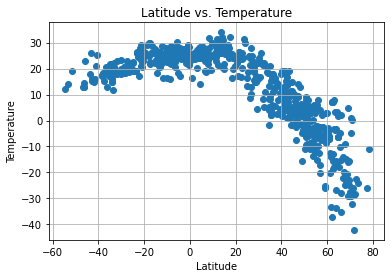

In [66]:
plt.scatter(lat,temp)
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.savefig("LatVTempPlot.png")

## Latitude vs. Humidity Plot

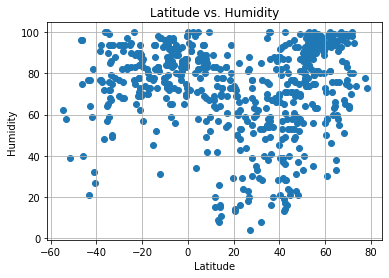

In [36]:
plt.scatter(lat,humidity)
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.savefig("LatVHumidPlot.png")

## Latitude vs. Cloudiness Plot

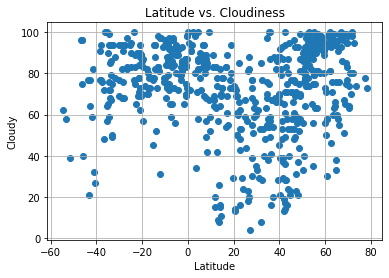

In [37]:
plt.scatter(lat,humidity)
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudy")
plt.grid(True)
plt.savefig("LatVCloudinessPlot.png")

## Latitude vs. Wind Speed Plot

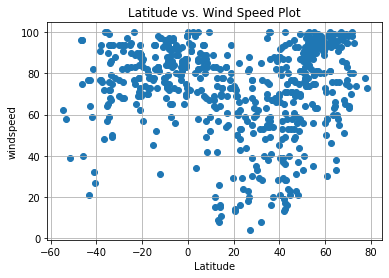

In [38]:
plt.scatter(lat,humidity)
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("windspeed")
plt.grid(True)
plt.savefig("LatVWindSpeedPlot.png")

## Linear Regression

In [39]:
def linRegression(xValue, yValue, title, coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xValue,yValue)
    regValues = xValue*slope+intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xValue,yValue)
    plt.plot(xValue,regValues,"r-")
    plt.annotate(line_eq,coord,fontsize=15,color="red")
    plt.title("Linear Regression")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.grid(True)
    print(f"The r-value is: {rvalue**2}")
    plt.show

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [42]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi_df = weather_data.loc[(weather_data["latitude"] >= 0)]
south_hemi_df = weather_data.loc[(weather_data["latitude"] < 0)]

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4382811012695604


Text(0, 0.5, 'Latitude Linear Regression')

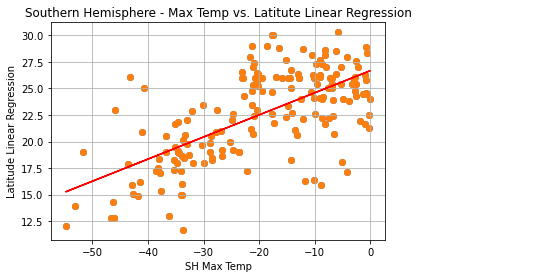

In [69]:
xValue = south_hemi_df['latitude']
yValue = south_hemi_df['temperature']
linRegression(xValue,yValue,"Temperature",(6,30))

plt.scatter(xValue,yValue)
plt.title("Southern Hemisphere - Max Temp vs. Latitute Linear Regression")
plt.xlabel("SH Max Temp")
plt.ylabel("Latitude Linear Regression")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18587472583253895


Text(0, 0.5, 'Latitude Linear Regression')

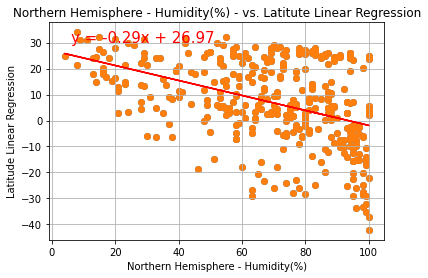

In [70]:
xValue = north_hemi_df['humidity']
yValue = north_hemi_df['temperature']
linRegression(xValue,yValue,"Temperature",(6,30))

plt.scatter(xValue,yValue)
plt.title("Northern Hemisphere - Humidity(%) - vs. Latitute Linear Regression")
plt.xlabel("Northern Hemisphere - Humidity(%)")
plt.ylabel("Latitude Linear Regression")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.029448052336815012


Text(0, 0.5, 'Latitude Linear Regression')

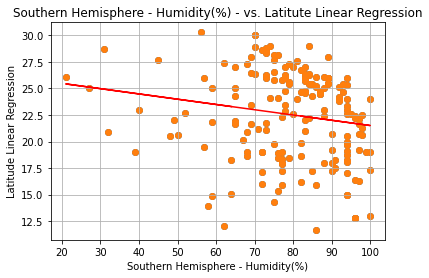

In [71]:
xValue = south_hemi_df['humidity']
yValue = south_hemi_df['temperature']
linRegression(xValue,yValue,"Temperature",(6,30))

plt.scatter(xValue,yValue)
plt.title("Southern Hemisphere - Humidity(%) - vs. Latitute Linear Regression")
plt.xlabel("Southern Hemisphere - Humidity(%)")
plt.ylabel("Latitude Linear Regression")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.026714674404910738


Text(0, 0.5, 'Latitude Linear Regression')

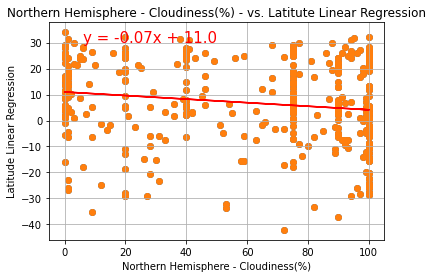

In [72]:
xValue = north_hemi_df['cloudiness']
yValue = north_hemi_df['temperature']
linRegression(xValue,yValue,"Temperature",(6,30))

plt.scatter(xValue,yValue)
plt.title("Northern Hemisphere - Cloudiness(%) - vs. Latitute Linear Regression")
plt.xlabel("Northern Hemisphere - Cloudiness(%)")
plt.ylabel("Latitude Linear Regression")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0002615338013873546


Text(0, 0.5, 'Latitude Linear Regression')

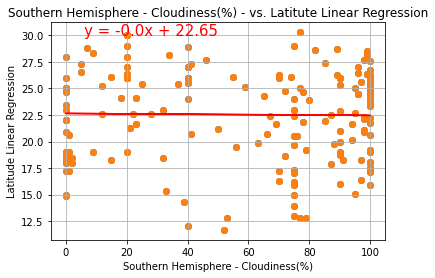

In [73]:
xValue = south_hemi_df['cloudiness']
yValue = south_hemi_df['temperature']
linRegression(xValue,yValue,"Temperature",(6,30))

plt.scatter(xValue,yValue)
plt.title("Southern Hemisphere - Cloudiness(%) - vs. Latitute Linear Regression")
plt.xlabel("Southern Hemisphere - Cloudiness(%)")
plt.ylabel("Latitude Linear Regression")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0007286776831716131


Text(0, 0.5, 'Latitude Linear Regression')

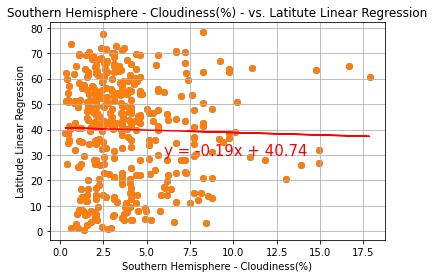

In [74]:
xValue = north_hemi_df['windspeed']
yValue = north_hemi_df['latitude']
linRegression(xValue,yValue,"Temperature",(6,30))

plt.scatter(xValue,yValue)
plt.title("Southern Hemisphere - Cloudiness(%) - vs. Latitute Linear Regression")
plt.xlabel("Southern Hemisphere - Cloudiness(%)")
plt.ylabel("Latitude Linear Regression")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06167430172197833


Text(0, 0.5, 'Latitude Linear Regression')

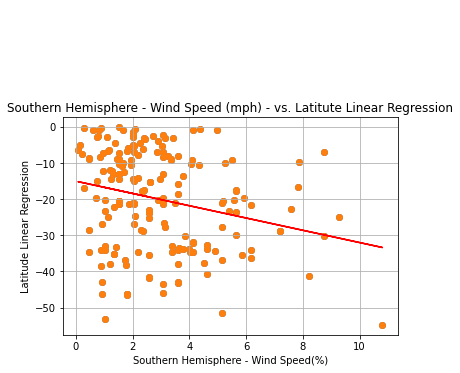

In [75]:
xValue = south_hemi_df['windspeed']
yValue = south_hemi_df['latitude']
linRegression(xValue,yValue,"Temperature",(6,30))

plt.scatter(xValue,yValue)
plt.title("Southern Hemisphere - Wind Speed (mph) - vs. Latitute Linear Regression")
plt.xlabel("Southern Hemisphere - Wind Speed(%)")
plt.ylabel("Latitude Linear Regression")